In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('dataSetWorkGabriel1.csv')
df.head(4)

,status,priority,reportdate,statusdate,customer
0,CAN,3,03/02/2023 12:11,03/02/2023 13:01,Stena
1,CAN,3,28/06/2023 14:51,29/06/2023 13:04,AGC
2,CAN,4,27/10/2023 13:10,31/10/2023 18:27,AGC
3,CLOSED,4,13/05/2022 11:40,25/08/2022 13:58,BioEnergy


In [5]:
df['reportdate'] = pd.to_datetime(df['reportdate'],format='%d/%m/%Y %H:%M')

In [7]:
df['statusdate'] = pd.to_datetime(df['statusdate'],format='%d/%m/%Y %H:%M')

In [9]:
df.head(5)

,status,priority,reportdate,statusdate,customer
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy


In [11]:
df.count(axis='columns')

0      5
1      5
2      5
3      5
4      5
      ..
227    5
228    5
229    5
230    5
231    5
Length: 232, dtype: int64

Text(0, 0.5, '')

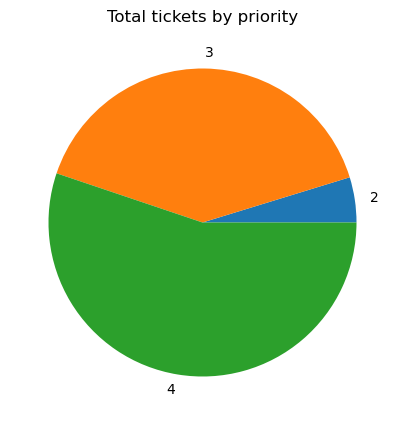

In [35]:
priority = df.groupby('priority').size()
priority.plot.pie(y='priority',figsize=(5,5))
plt.title('Total tickets by priority')
plt.ylabel('')

In [36]:
df.head(5)

,status,priority,reportdate,statusdate,customer
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy


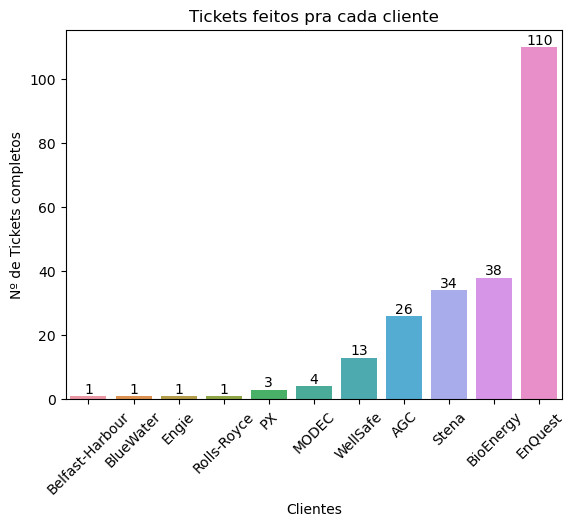

In [104]:
customer = df.groupby('customer').size()
customer = customer.sort_values()
customerdf = pd.DataFrame({'customer':customer.index, 'number':customer.values})
customerdf
ax = sns.barplot(data=customerdf, y='number',x='customer')
plt.xticks(rotation=45)
plt.title("Tickets feitos pra cada cliente")
plt.ylabel("Nº de Tickets completos")
plt.xlabel("Clientes")
for i in ax.containers:
    ax.bar_label(i)
    


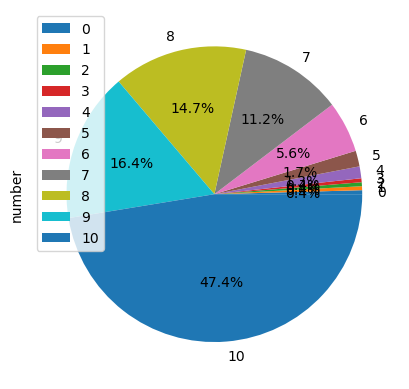

In [136]:
axx = customerdf.plot.pie(y='number',x='customer',autopct='%1.1f%%')

In [152]:
df

,status,priority,reportdate,statusdate,customer,completiontime
0,CAN,3,2023-03-02 12:11:00,2023-02-03 13:01:00,Stena,-27
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,0
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,4
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,104
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,74
...,...,...,...,...,...,...
227,RESOLVED,3,2024-03-01 09:57:00,2024-01-11 11:07:00,AGC,-50
228,RESOLVED,3,2024-03-01 12:55:00,2024-01-04 12:10:00,AGC,-58
229,RESOLVED,4,2024-11-01 10:58:00,2024-01-11 13:32:00,AGC,-295
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,0


In [244]:
df['statusdate'] = pd.to_datetime(df['statusdate'],dayfirst=True)
df['reportdate'] = pd.to_datetime(df['reportdate'],dayfirst=True)
#df['completiontime'] = (df['statusdate']-df['reportdate']).dt.days


<Axes: >

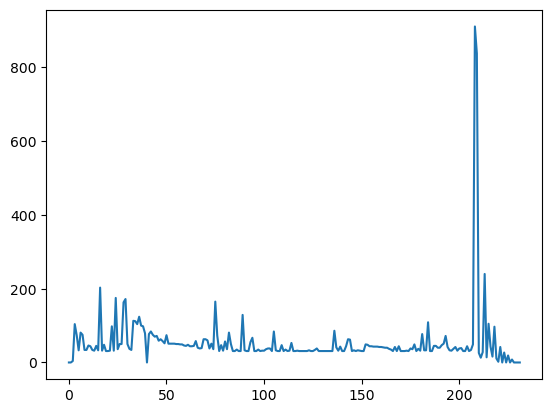

In [167]:
df['completiontime'].plot()

In [184]:
df.loc[(df['customer']=="PX")]['completiontime'].mean()

90.66666666666667

In [227]:
df['qtyticket'] = (np.arange(len(df)) )

In [188]:
df

,status,priority,reportdate,statusdate,customer,completiontime,qtyticket
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena,0,1
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,0,2
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,4,3
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,104,4
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,74,5
...,...,...,...,...,...,...,...
227,RESOLVED,3,2024-01-03 09:57:00,2024-01-11 11:07:00,AGC,8,228
228,RESOLVED,3,2024-01-03 12:55:00,2024-01-04 12:10:00,AGC,0,229
229,RESOLVED,4,2024-01-11 10:58:00,2024-01-11 13:32:00,AGC,0,230
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,0,231


In [246]:
df['yearmonth'] = (df['statusdate'].dt.to_period('M'))
df

,status,priority,reportdate,statusdate,customer,yearmonth
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena,2023-02
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,2023-06
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,2023-10
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,2022-08
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,2022-08
...,...,...,...,...,...,...
227,RESOLVED,3,2024-01-03 09:57:00,2024-01-11 11:07:00,AGC,2024-01
228,RESOLVED,3,2024-01-03 12:55:00,2024-01-04 12:10:00,AGC,2024-01
229,RESOLVED,4,2024-01-11 10:58:00,2024-01-11 13:32:00,AGC,2024-01
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,2024-01


In [229]:
df.set_index('qtyticket',inplace=True)

In [249]:
df

,status,priority,reportdate,statusdate,customer,yearmonth
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena,2023-02
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,2023-06
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,2023-10
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,2022-08
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,2022-08
...,...,...,...,...,...,...
227,RESOLVED,3,2024-01-03 09:57:00,2024-01-11 11:07:00,AGC,2024-01
228,RESOLVED,3,2024-01-03 12:55:00,2024-01-04 12:10:00,AGC,2024-01
229,RESOLVED,4,2024-01-11 10:58:00,2024-01-11 13:32:00,AGC,2024-01
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,2024-01


In [248]:
df

,status,priority,reportdate,statusdate,customer,yearmonth
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena,2023-02
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,2023-06
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,2023-10
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,2022-08
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,2022-08
...,...,...,...,...,...,...
227,RESOLVED,3,2024-01-03 09:57:00,2024-01-11 11:07:00,AGC,2024-01
228,RESOLVED,3,2024-01-03 12:55:00,2024-01-04 12:10:00,AGC,2024-01
229,RESOLVED,4,2024-01-11 10:58:00,2024-01-11 13:32:00,AGC,2024-01
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,2024-01


In [250]:
tMonthYear = df['yearmonth'].value_counts().reset_index()
tMonthYear.columns = ['yearmonth','Count']
tMonthYear

,yearmonth,Count
0,2023-03,30
1,2023-06,29
2,2023-07,27
3,2023-05,22
4,2023-09,19
5,2023-08,17
6,2023-11,15
7,2023-04,15
8,2023-10,12
9,2022-10,9


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '2023-03'),
  Text(1, 0, '2023-06'),
  Text(2, 0, '2023-07'),
  Text(3, 0, '2023-05'),
  Text(4, 0, '2023-09'),
  Text(5, 0, '2023-08'),
  Text(6, 0, '2023-11'),
  Text(7, 0, '2023-04'),
  Text(8, 0, '2023-10'),
  Text(9, 0, '2022-10'),
  Text(10, 0, '2024-01'),
  Text(11, 0, '2023-12'),
  Text(12, 0, '2022-09'),
  Text(13, 0, '2022-11'),
  Text(14, 0, '2023-01'),
  Text(15, 0, '2022-08'),
  Text(16, 0, '2022-07'),
  Text(17, 0, '2023-02')])

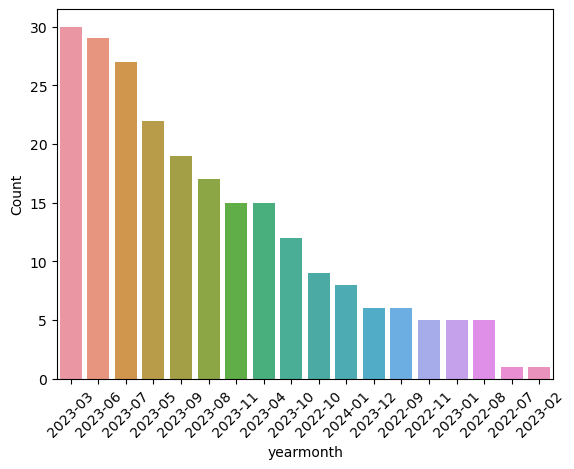

In [253]:
sns.barplot(data=tMonthYear, x='yearmonth',y='Count')
plt.xticks(rotation=45)

In [254]:
df['yearmonth'].size().cumsum().reset_index(name='count')

TypeError: 'int' object is not callable

Text(0.5, 1.0, 'Quantidade de tickets ao longo do tempo')

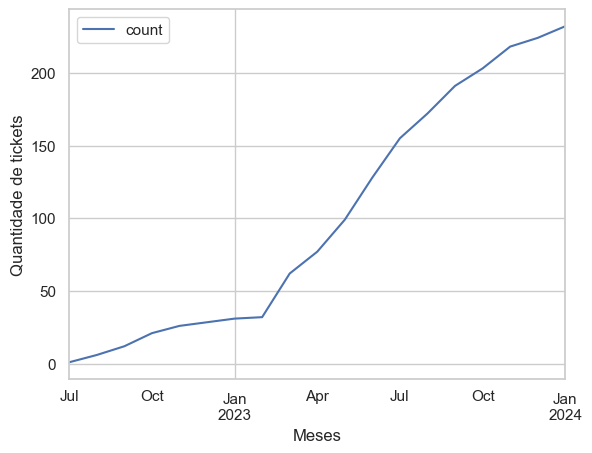

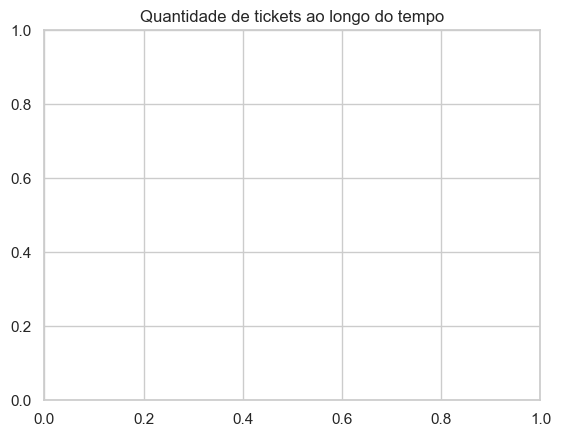

In [289]:
monthly_sum = df.groupby(df['statusdate'].dt.to_period('M')).size().cumsum().reset_index(name='count')
monthly_sum['count'] = pd.to_numeric(monthly_sum['count'], errors='coerce')
monthly_sum.plot(x='statusdate')
plt.xlabel('Meses')
plt.ylabel('Quantidade de tickets')
plt.figure()
plt.title("Quantidade de tickets ao longo do tempo")

KeyError: 'x'

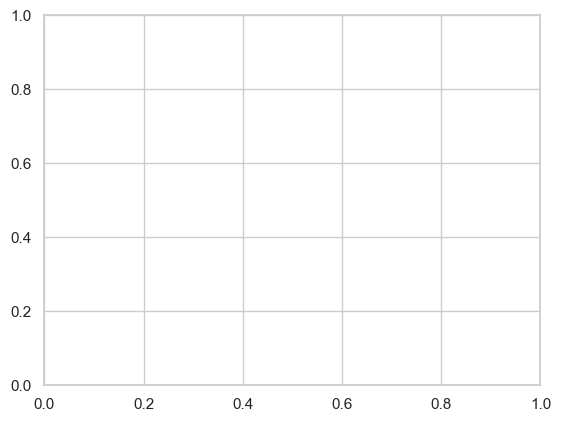

In [271]:

sns.lineplot(data=monthly_sum,x="statusdate",y="count")

TypeError: float() argument must be a string or a real number, not 'Period'

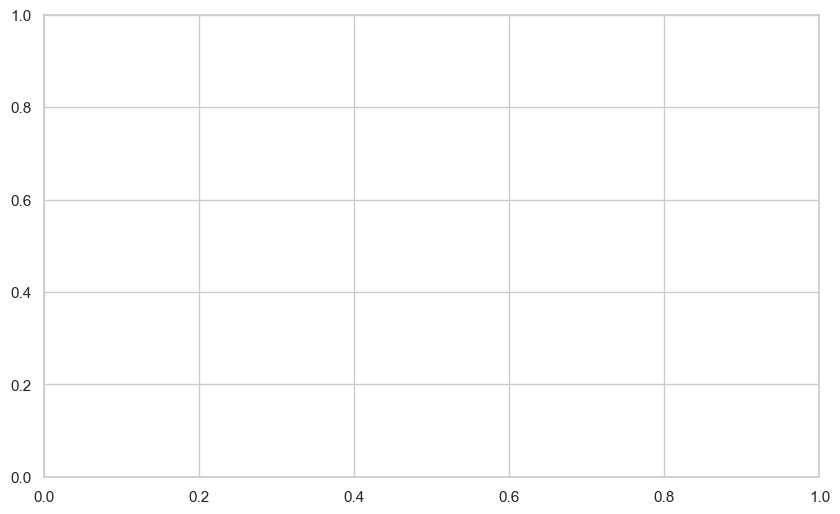

In [287]:
monthly_sum = df.groupby(df['statusdate'].dt.to_period('M')).size().cumsum().reset_index(name='count')
monthly_sum['count'] = pd.to_numeric(monthly_sum['count'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(monthly_sum['statusdate'], monthly_sum['count'])
plt.xlabel('Meses')
plt.ylabel('Quantidade de tickets')

plt.title("Quantidade de tickets ao longo do tempo")

In [290]:
df

,status,priority,reportdate,statusdate,customer,yearmonth
0,CAN,3,2023-02-03 12:11:00,2023-02-03 13:01:00,Stena,2023-02
1,CAN,3,2023-06-28 14:51:00,2023-06-29 13:04:00,AGC,2023-06
2,CAN,4,2023-10-27 13:10:00,2023-10-31 18:27:00,AGC,2023-10
3,CLOSED,4,2022-05-13 11:40:00,2022-08-25 13:58:00,BioEnergy,2022-08
4,CLOSED,3,2022-06-13 08:22:00,2022-08-26 12:58:00,BioEnergy,2022-08
...,...,...,...,...,...,...
227,RESOLVED,3,2024-01-03 09:57:00,2024-01-11 11:07:00,AGC,2024-01
228,RESOLVED,3,2024-01-03 12:55:00,2024-01-04 12:10:00,AGC,2024-01
229,RESOLVED,4,2024-01-11 10:58:00,2024-01-11 13:32:00,AGC,2024-01
230,RESOLVED,4,2024-01-16 08:34:00,2024-01-16 11:09:00,EnQuest,2024-01
